In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
from IPython.core.display import HTML
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn import metrics
from datetime import datetime
from scipy.sparse import hstack
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve, confusion_matrix

# Import dataset

In [2]:
df = pd.read_csv('C:/Users/adeye/Downloads/fake_real_news_dataset-main/fake_real_news_dataset-main/fake_and_real_news_dataset.csv')
print(f"The shape of the dataset is: {df.shape}")

The shape of the dataset is: (4594, 4)


In [3]:
df.head(10)

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
5,rUyP$g4n&0,Abortion poses challenge for GOP in 2016,Washington (CNN) Tens of thousands of pro-life...,REAL
6,az^W_%PKst,The Trump Campaign is Low on Funds,Donald Trump’s presidential campaign is runnin...,REAL
7,03Ig$1cBYY,Here’s how a wealthy Trump supporter could giv...,Word of warning: The following story contains ...,REAL
8,EOIt(fs&Ql,Trump’s deal with the RNC shows how big money ...,The deal Donald Trump struck with the Republic...,REAL
9,nMLauxZKYf,Hillary Clinton: Cure for Citizens United is m...,Former Secretary of State Hillary Clinton is a...,REAL


In [4]:
df.tail(10)

,idd,title,text,label
4584,KAvRt7&LwR,Top Citi Analyst Issues Important Update On Th...,"20 Views November 03, 2016 GOLD , KWN King Wor...",FAKE
4585,3S#Vahi8AG,Re: Michelle Obama calls for a ‘president who ...,WATCH: Pay no attention to 2008 Michelle Obama...,FAKE
4586,Xmieh@jNyM,The Book Of Alien Races Exposed,The Book Of Alien Races Exposed # Timotei Simo...,FAKE
4587,QqGxN%Ayqc,Parsing the Comey Letter with Michel Chossudov...,Leave a reply \nJames Corbett – FBI Director J...,FAKE
4588,(2s3fZyV+%,Should I Get Botox?,Support Us Should I Get Botox? \nsource Add To...,FAKE
4589,ukZm6JTO#x,Russia Calls the War Party's Bluff,License DMCA \nCold War 2.0 has reached unprec...,FAKE
4590,yu0xKEiapJ,Bernie Sanders: The Democratic primary gave me...,Print \nSen. Bernie Sanders laid out the ways ...,FAKE
4591,c4Y370E_9c,"Pipeline Police Strip Search Native Girl, Then...",As the pressure to start construction on the D...,FAKE
4592,bBbeuCUeMH,Currency Crisis: Alasdair MacLeod On The Vexed...,Tweet Home » Gold » Gold News » Currency Crisi...,FAKE
4593,vE44sWBnd9,Paper Tiger ISIS Digs Into Mosul,Written by Eric Margolis As a former soldier...,FAKE


# Reassigning the label feature output 

In [5]:
df['label'] = df['label'].replace({'REAL': 1, 'FAKE': 0})

In [6]:
df.head(10)

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,1
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,1
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",1
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,1
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,1
5,rUyP$g4n&0,Abortion poses challenge for GOP in 2016,Washington (CNN) Tens of thousands of pro-life...,1
6,az^W_%PKst,The Trump Campaign is Low on Funds,Donald Trump’s presidential campaign is runnin...,1
7,03Ig$1cBYY,Here’s how a wealthy Trump supporter could giv...,Word of warning: The following story contains ...,1
8,EOIt(fs&Ql,Trump’s deal with the RNC shows how big money ...,The deal Donald Trump struck with the Republic...,1
9,nMLauxZKYf,Hillary Clinton: Cure for Citizens United is m...,Former Secretary of State Hillary Clinton is a...,1


In [7]:
df.tail(10)

,idd,title,text,label
4584,KAvRt7&LwR,Top Citi Analyst Issues Important Update On Th...,"20 Views November 03, 2016 GOLD , KWN King Wor...",0
4585,3S#Vahi8AG,Re: Michelle Obama calls for a ‘president who ...,WATCH: Pay no attention to 2008 Michelle Obama...,0
4586,Xmieh@jNyM,The Book Of Alien Races Exposed,The Book Of Alien Races Exposed # Timotei Simo...,0
4587,QqGxN%Ayqc,Parsing the Comey Letter with Michel Chossudov...,Leave a reply \nJames Corbett – FBI Director J...,0
4588,(2s3fZyV+%,Should I Get Botox?,Support Us Should I Get Botox? \nsource Add To...,0
4589,ukZm6JTO#x,Russia Calls the War Party's Bluff,License DMCA \nCold War 2.0 has reached unprec...,0
4590,yu0xKEiapJ,Bernie Sanders: The Democratic primary gave me...,Print \nSen. Bernie Sanders laid out the ways ...,0
4591,c4Y370E_9c,"Pipeline Police Strip Search Native Girl, Then...",As the pressure to start construction on the D...,0
4592,bBbeuCUeMH,Currency Crisis: Alasdair MacLeod On The Vexed...,Tweet Home » Gold » Gold News » Currency Crisi...,0
4593,vE44sWBnd9,Paper Tiger ISIS Digs Into Mosul,Written by Eric Margolis As a former soldier...,0


# Shuffle the dataset

In [8]:
df = df.sample(frac=1, random_state=2)

In [9]:
df.isna().sum()

idd      0
title    1
text     0
label    0
dtype: int64

In [10]:
df.fillna(" ", inplace= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4594 entries, 1087 to 2575
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idd     4594 non-null   object
 1   title   4594 non-null   object
 2   text    4594 non-null   object
 3   label   4594 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 179.5+ KB


In [12]:
df.isna().sum()

idd      0
title    0
text     0
label    0
dtype: int64

In [13]:
df = df.drop(['idd', 'title'], axis = 1)

In [14]:
df.head(10)

,text,label
1087,A new national poll in the battle for the 2016...,1
3474,HILLARY’S (Islamic) AMERICA IS ALREADY HERE wh...,0
1125,"Taya Kyle is the author of ""American Wife: A M...",1
3328,EU UN Secretary-General Ban Ki-moon (C) meets ...,0
278,And then there was one.\n\nThere is an express...,1
2063,WASHINGTON — President Obama declared Donald T...,1
2607,Click Here To Learn More About Alexandra's Per...,0
1149,Democratic presidential candidates Hillary Cli...,1
418,What the Empire State's primary vote really do...,1
4052,UNIDENTIFIED (MUSLIM?) ‘knifeman’ on the run a...,0


# Create word cloud before preprocesing text

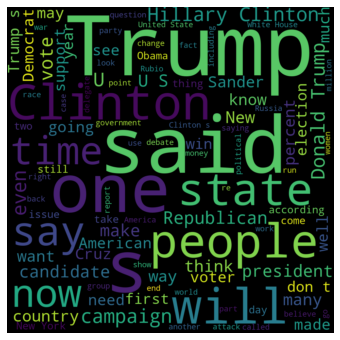

In [15]:
plt.figure(figsize=(8, 6))
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Preprocessing function

In [16]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<,*?>+', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
df['text'] = df['text'].apply(wordopt)

In [18]:
df.head(10)

,text,label
1087,a new national poll in the battle for the dem...,1
3474,hillary s islamic america is already here wh...,0
1125,taya kyle is the author of american wife a m...,1
3328,eu un secretary general ban ki moon c meets ...,0
278,and then there was one there is an expressio...,1
2063,washington president obama declared donald t...,1
2607,click here to learn more about alexandra s per...,0
1149,democratic presidential candidates hillary cli...,1
418,what the empire state s primary vote really do...,1
4052,unidentified muslim knifeman on the run a...,0


# Create word cloud after preprocesing text

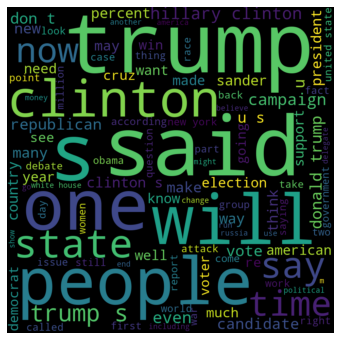

In [19]:
plt.figure(figsize=(8, 6))
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Split data into train & test data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'],test_size=0.2, random_state=42)

In [21]:
X_train.shape

(3675,)

# Training of the feature using different models

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Train Using SVC

In [23]:
model_svc = make_pipeline(TfidfVectorizer(), SVC())

In [24]:
model_svc.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [25]:
y_pred = model_svc.predict(X_test)

In [26]:
cm_svc = confusion_matrix(y_test, y_pred)

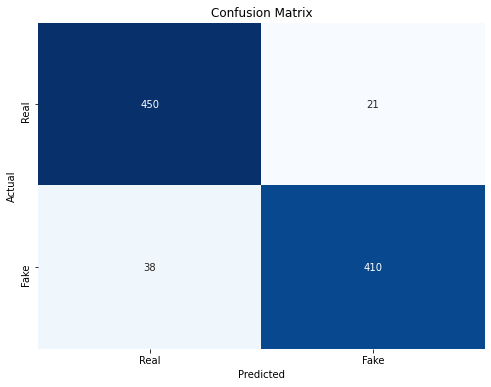

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       471
           1       0.95      0.92      0.93       448

    accuracy                           0.94       919
   macro avg       0.94      0.94      0.94       919
weighted avg       0.94      0.94      0.94       919



# Train Using Logistic Regression

In [29]:
LR = LogisticRegression()

In [30]:
model_lr = make_pipeline(TfidfVectorizer(), LR)

In [31]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [32]:
y_pred_lr = model_lr.predict(X_test)

In [33]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

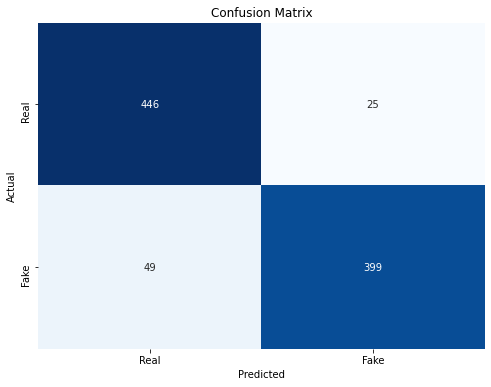

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       471
           1       0.94      0.89      0.92       448

    accuracy                           0.92       919
   macro avg       0.92      0.92      0.92       919
weighted avg       0.92      0.92      0.92       919



# Train Using Decision Tree Classifier

In [36]:
DT = DecisionTreeClassifier()

In [37]:
model_dt = make_pipeline(TfidfVectorizer(), DT)

In [38]:
model_dt.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [39]:
y_pred_dt = model_dt.predict(X_test)

In [40]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

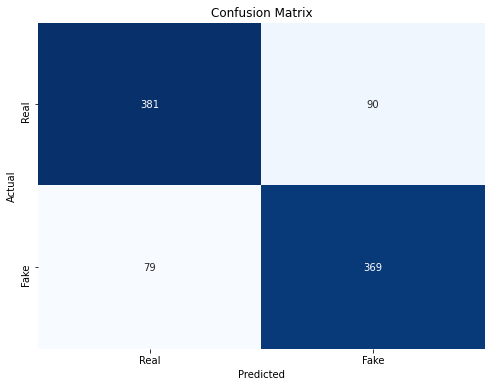

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       471
           1       0.80      0.82      0.81       448

    accuracy                           0.82       919
   macro avg       0.82      0.82      0.82       919
weighted avg       0.82      0.82      0.82       919



# Train Using Random Forest Classifier

In [43]:
RF = RandomForestClassifier()

In [44]:
model_rf = make_pipeline(TfidfVectorizer(), RF)

In [45]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [46]:
y_pred_rf = model_rf.predict(X_test)

In [47]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

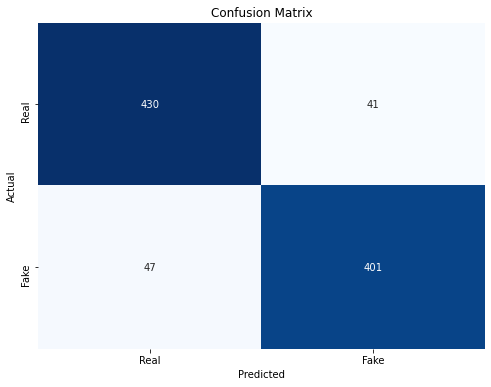

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       471
           1       0.80      0.82      0.81       448

    accuracy                           0.82       919
   macro avg       0.82      0.82      0.82       919
weighted avg       0.82      0.82      0.82       919



# Train Using LSTM MODEL

In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Pad sequences to ensure uniform length
max_seq_length = 100  
sequences_padded = pad_sequences(sequences, maxlen=max_seq_length)

# Splitting the data into features and labels
X = sequences_padded
y = df['label']

# Splitting the data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, random_state=49)

# Defining the LSTM model
embedding_dim = 128
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length),
    LSTM(units=64),
    Dense(units=1, activation='sigmoid')
])

# Compiling the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=3, batch_size=64, validation_split=0.2)

# Evaluating the LSTM model on training data
train_loss, train_accuracy = lstm_model.evaluate(X_train_lstm, y_train_lstm)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

# Evaluating the LSTM model on testing data
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/3
46/46 [==============================] - 9s 141ms/step - loss: 0.5804 - accuracy: 0.6980 - val_loss: 0.4440 - val_accuracy: 0.8231
Epoch 2/3
46/46 [==============================] - 6s 127ms/step - loss: 0.2217 - accuracy: 0.9272 - val_loss: 0.3256 - val_accuracy: 0.8653
Epoch 3/3
115/115 [==============================] - 2s 17ms/step - loss: 0.1112 - accuracy: 0.9660
Training Loss: 0.11120018362998962, Training Accuracy: 0.9659863710403442
29/29 [==============================] - 1s 21ms/step - loss: 0.4122 - accuracy: 0.8662
Test Loss: 0.41223329305648804, Test Accuracy: 0.8661588430404663


In [52]:
# Defining the LSTM model
embedding_dim = 128
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    BatchNormalization(),
    LSTM(units=32, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='relu')
])

# Compiling the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)  # Specify learning rate if needed
lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_split=0.2)

# Evaluating the LSTM model on training data
train_loss, train_accuracy = lstm_model.evaluate(X_train_lstm, y_train_lstm)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

# Evaluating the LSTM model on testing data
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/5
92/92 [==============================] - 23s 197ms/step - loss: 1.9763 - accuracy: 0.6031 - val_loss: 0.7561 - val_accuracy: 0.5102
Epoch 2/5
92/92 [==============================] - 15s 164ms/step - loss: 0.5977 - accuracy: 0.8456 - val_loss: 0.6813 - val_accuracy: 0.5102
Epoch 3/5
92/92 [==============================] - 15s 166ms/step - loss: 0.3240 - accuracy: 0.9476 - val_loss: 0.7755 - val_accuracy: 0.5102
Epoch 4/5
92/92 [==============================] - 16s 170ms/step - loss: 0.1397 - accuracy: 0.9735 - val_loss: 0.4410 - val_accuracy: 0.7905
Epoch 5/5
115/115 [==============================] - 3s 22ms/step - loss: 0.1894 - accuracy: 0.9551
Training Loss: 0.1894175410270691, Training Accuracy: 0.9551020264625549
29/29 [==============================] - 1s 21ms/step - loss: 0.5989 - accuracy: 0.7867
Test Loss: 0.5988971590995789, Test Accuracy: 0.7867246866226196


In [53]:
# Defining the LSTM model
embedding_dim = 128
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    BatchNormalization(),
    LSTM(units=32, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='relu')
])

# Compiling the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)  # Specify learning rate if needed
lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the LSTM model with early stopping
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, 
                          validation_split=0.2, callbacks=[early_stopping])

# Evaluating the LSTM model on training data
train_loss, train_accuracy = lstm_model.evaluate(X_train_lstm, y_train_lstm)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

# Evaluating the LSTM model on testing data
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/5
92/92 [==============================] - 23s 196ms/step - loss: 1.3119 - accuracy: 0.6051 - val_loss: 0.7477 - val_accuracy: 0.5102
Epoch 2/5
92/92 [==============================] - 15s 168ms/step - loss: 0.3556 - accuracy: 0.8878 - val_loss: 0.6645 - val_accuracy: 0.5116
Epoch 3/5
92/92 [==============================] - 18s 197ms/step - loss: 0.1677 - accuracy: 0.9639 - val_loss: 0.5285 - val_accuracy: 0.7456
Epoch 4/5
92/92 [==============================] - 17s 182ms/step - loss: 0.0731 - accuracy: 0.9895 - val_loss: 0.4929 - val_accuracy: 0.7810
Epoch 5/5
115/115 [==============================] - 4s 30ms/step - loss: 0.1853 - accuracy: 0.9524
Training Loss: 0.1853371113538742, Training Accuracy: 0.9523809552192688
29/29 [==============================] - 1s 26ms/step - loss: 0.7199 - accuracy: 0.7889
Test Loss: 0.7198594808578491, Test Accuracy: 0.7889009714126587


In [54]:
# Defining the LSTM model
embedding_dim = 128
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    BatchNormalization(),
    LSTM(units=32, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='relu')
])

# Compiling the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)  # Specify learning rate if needed
lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the LSTM model with early stopping
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, 
                          validation_split=0.2, callbacks=[early_stopping])

# Evaluating the LSTM model on training data
train_loss, train_accuracy = lstm_model.evaluate(X_train_lstm, y_train_lstm)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

# Evaluating the LSTM model on testing data
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/5
46/46 [==============================] - 19s 279ms/step - loss: 1.6033 - accuracy: 0.6122 - val_loss: 0.8896 - val_accuracy: 0.5102
Epoch 2/5
46/46 [==============================] - 12s 263ms/step - loss: 0.4926 - accuracy: 0.8633 - val_loss: 0.8473 - val_accuracy: 0.5102
Epoch 3/5
46/46 [==============================] - 12s 269ms/step - loss: 0.2399 - accuracy: 0.9548 - val_loss: 0.7912 - val_accuracy: 0.5102
Epoch 4/5
46/46 [==============================] - 12s 264ms/step - loss: 0.1357 - accuracy: 0.9823 - val_loss: 0.7499 - val_accuracy: 0.5102
Epoch 5/5
115/115 [==============================] - 5s 47ms/step - loss: 0.5406 - accuracy: 0.5197
Training Loss: 0.5406416058540344, Training Accuracy: 0.519727885723114
29/29 [==============================] - 1s 39ms/step - loss: 0.7078 - accuracy: 0.4755
Test Loss: 0.7078295946121216, Test Accuracy: 0.4755168557167053


In [55]:
# Defining the LSTM model
embedding_dim = 128
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    BatchNormalization(),
    LSTM(units=32, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='relu')
])

# Compiling the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)  # Specify learning rate if needed
lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the LSTM model with early stopping
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, 
                          validation_split=0.2, callbacks=[early_stopping])

# Evaluating the LSTM model on training data
train_loss, train_accuracy = lstm_model.evaluate(X_train_lstm, y_train_lstm)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

# Evaluating the LSTM model on testing data
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/5
92/92 [==============================] - 21s 171ms/step - loss: 2.6346 - accuracy: 0.6197 - val_loss: 3.5041 - val_accuracy: 0.6177
Epoch 2/5
92/92 [==============================] - 16s 176ms/step - loss: 2.8164 - accuracy: 0.7003 - val_loss: 2.1056 - val_accuracy: 0.6585
Epoch 3/5
92/92 [==============================] - 16s 174ms/step - loss: 1.9405 - accuracy: 0.8201 - val_loss: 1.8559 - val_accuracy: 0.6816
Epoch 4/5
92/92 [==============================] - 16s 177ms/step - loss: 1.2253 - accuracy: 0.8452 - val_loss: 1.2283 - val_accuracy: 0.7143
Epoch 5/5
115/115 [==============================] - 3s 29ms/step - loss: 1.1024 - accuracy: 0.8082
Training Loss: 1.1023683547973633, Training Accuracy: 0.8081632852554321
29/29 [==============================] - 1s 30ms/step - loss: 1.8028 - accuracy: 0.6551
Test Loss: 1.8027536869049072, Test Accuracy: 0.6550598740577698


In [56]:
# Defining the LSTM model
embedding_dim = 128
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    BatchNormalization(),
    LSTM(units=32, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='relu')
])

# Compiling the model with Adam optimizer
optimizer = Adam(learning_rate=0.0001)  # Specify learning rate if needed
lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the LSTM model with early stopping
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, 
                          validation_split=0.2, callbacks=[early_stopping])

# Evaluating the LSTM model on training data
train_loss, train_accuracy = lstm_model.evaluate(X_train_lstm, y_train_lstm)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

# Evaluating the LSTM model on testing data
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/5
92/92 [==============================] - 23s 180ms/step - loss: 2.6789 - accuracy: 0.5293 - val_loss: 1.1600 - val_accuracy: 0.5102
Epoch 2/5
92/92 [==============================] - 16s 177ms/step - loss: 1.2499 - accuracy: 0.6238 - val_loss: 0.9728 - val_accuracy: 0.5102
Epoch 3/5
92/92 [==============================] - 17s 183ms/step - loss: 0.8263 - accuracy: 0.6986 - val_loss: 0.8507 - val_accuracy: 0.5102
Epoch 4/5
92/92 [==============================] - 17s 185ms/step - loss: 0.6565 - accuracy: 0.7541 - val_loss: 0.7636 - val_accuracy: 0.5102
Epoch 5/5
115/115 [==============================] - 9s 74ms/step - loss: 0.5878 - accuracy: 0.5867
Training Loss: 0.5878341197967529, Training Accuracy: 0.5866666436195374
29/29 [==============================] - 3s 88ms/step - loss: 0.6943 - accuracy: 0.5484
Test Loss: 0.6943093538284302, Test Accuracy: 0.5484222173690796


In [57]:
# Defining the LSTM model
embedding_dim = 128
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    BatchNormalization(),
    LSTM(units=32, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

# Compiling the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=8, batch_size=64, validation_split=0.2)

# Evaluating the LSTM model on training data
train_loss, train_accuracy = lstm_model.evaluate(X_train_lstm, y_train_lstm)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

# Evaluating the LSTM model on testing data
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/8
46/46 [==============================] - 20s 305ms/step - loss: 0.5164 - accuracy: 0.7347 - val_loss: 0.5387 - val_accuracy: 0.8204
Epoch 2/8
46/46 [==============================] - 14s 304ms/step - loss: 0.1660 - accuracy: 0.9439 - val_loss: 0.4871 - val_accuracy: 0.8503
Epoch 3/8
46/46 [==============================] - 13s 293ms/step - loss: 0.0467 - accuracy: 0.9881 - val_loss: 0.4502 - val_accuracy: 0.8245
Epoch 4/8
46/46 [==============================] - 14s 307ms/step - loss: 0.0260 - accuracy: 0.9932 - val_loss: 0.4141 - val_accuracy: 0.8163
Epoch 5/8
46/46 [==============================] - 14s 304ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.4445 - val_accuracy: 0.8463
Epoch 6/8
46/46 [==============================] - 15s 317ms/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.3723 - val_accuracy: 0.8408
Epoch 7/8
46/46 [==============================] - 14s 303ms/step - loss: 0.0089 - accuracy: 0.9980 - val_loss: 0.4509 - val_accuracy: 0.8299
Epoch 